In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

sns.set(style = 'white')

# chargement du dataset 
df = pd.read_csv('../telco_customer_churn.csv')
# Afficher les premières lignes pour vérifier le chargement
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [39]:
# Dimensions du dataset
print(f"dimensions du dataset : {df.shape}")

dimensions du dataset : (7043, 21)


In [40]:
#types des données
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [41]:
# Statistiques de base pour les colonnes numériques
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [42]:
# les valeurs des varibales 
data_columns = df.columns.tolist()
for column in data_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


In [43]:
print("Le type de TotaleCharges est :", df.TotalCharges.dtypes)
# Total charges est de types object malgré qu'il est numerique
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#types des données
print("Le type de TotaleCharges est devenu :", df.TotalCharges.dtypes)
df.dtypes

Le type de TotaleCharges est : object
Le type de TotaleCharges est devenu : float64


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [44]:
# compte le nombre de vals manquantes (NaN) dans chaque colonne 
df.isnull().sum()
# La colonne  TotaleCharges contient 11 vals manquantes 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
#afficher ces valeurs manquantes de la colonne TotalCharges
val_Nan = df[np.isnan(df['TotalCharges'])]
print(val_Nan)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [46]:
#Removing missing values de la colonne TotalCharges
#Dropna supprimes les lignes par défaut 
df.dropna(inplace = True) 
# compte le nombre de vals manquantes (NaN) dans chaque colonne 
df.isnull().sum()
#Remove customer IDs from the data set,Les IDs ne fournissent pas d'info utile pour prédire le "Churn"
df2 = df.iloc[:,1:]
#df.drop(['customerID'], axis=1, inplace=True)
print(df2.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


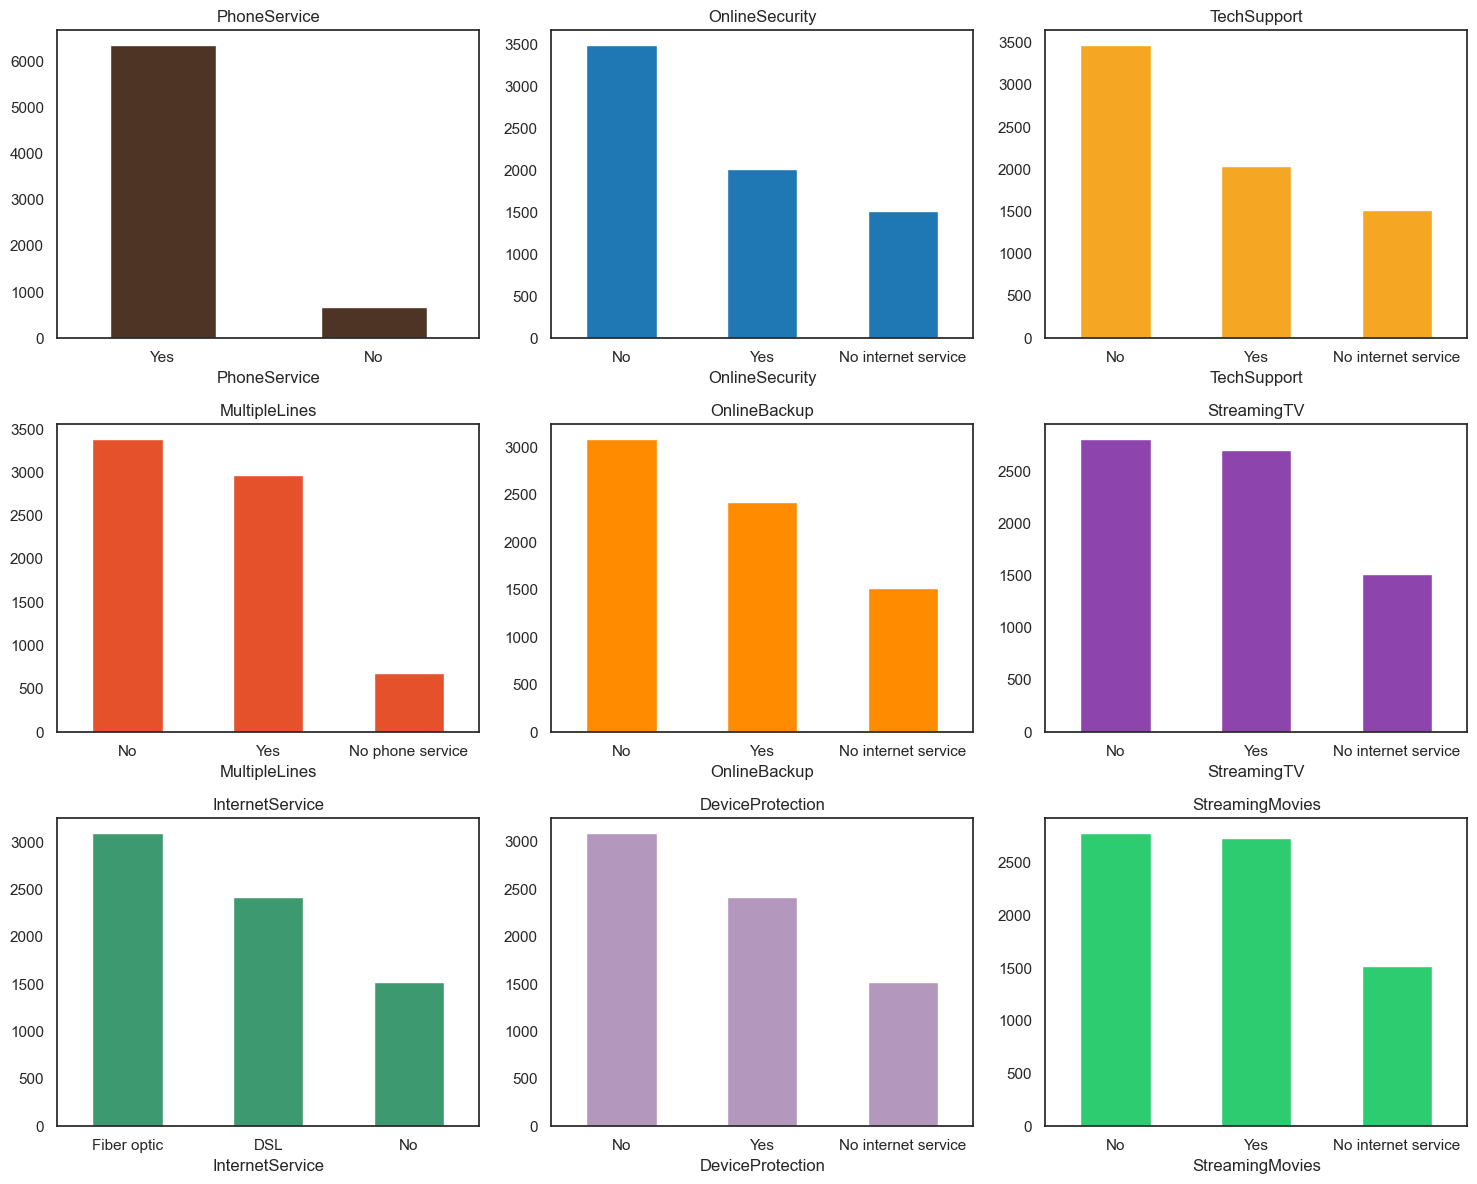

In [47]:
#ce code permet d'explorer la présence ou l'absence des différents services 
import matplotlib.pyplot as plt

# Liste des services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Choix des couleurs
colors = ['#4D3425', '#E4512B', '#3D9970', '#1F77B4', '#FF8C00', '#B497BD', '#F5A623', '#8E44AD', '#2ECC71']

# Création de la figure et des axes pour le sous-graphiques
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Boucle pour itérer sur les services et créer des graphiques
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=colors[i])
    elif i >= 3 and i < 6:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0, color=colors[i])
    else:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0, color=colors[i])

    ax.set_title(item)

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()
plt.show()


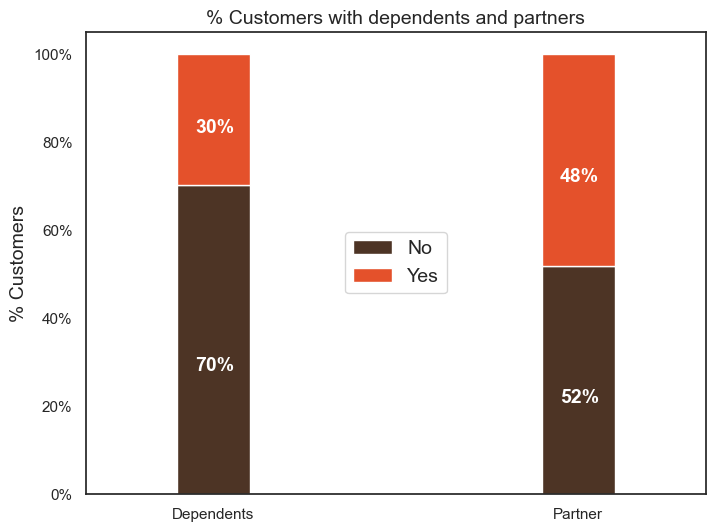

In [48]:
# L'analyse de la distribution des partenaires et des dépendants
df3 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df4 = df3.groupby(['variable','value']).count().unstack()
df4 = df4*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df4.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

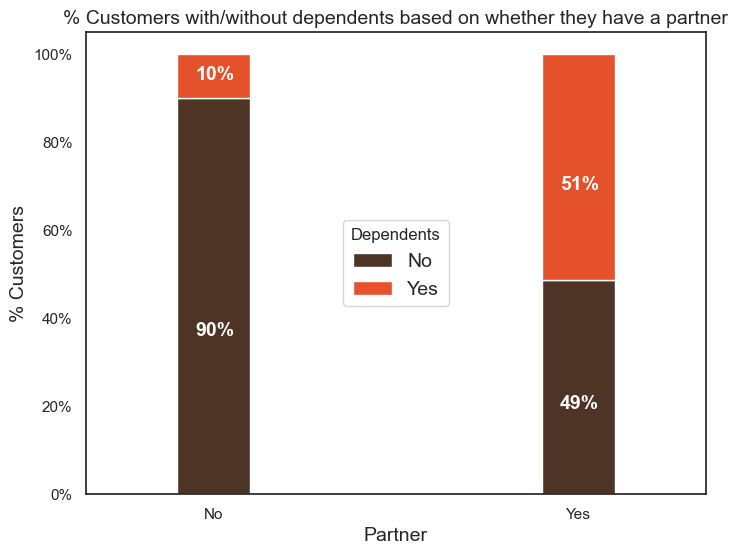

In [49]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data lab*els on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

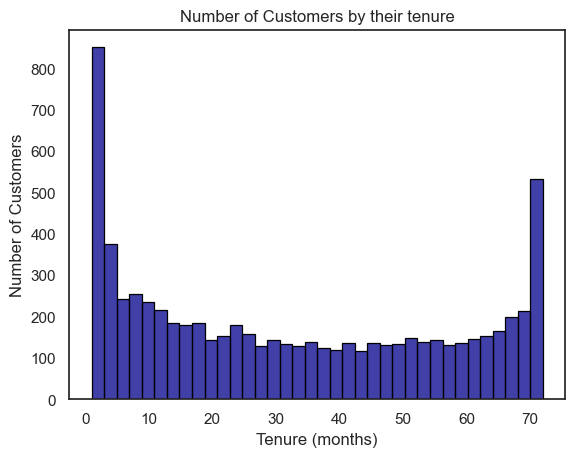

In [50]:
#B. Customer Account Information
#La distribution de la durée d'abonnement (tenure)
import seaborn as sns
import matplotlib.pyplot as plt

# Using histplot instead of distplot
ax = sns.histplot(df['tenure'], bins=int(180/5), color='darkblue', kde=False,
                  edgecolor='black')

# Setting labels and title
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

plt.show()


Text(0.5, 1.0, '# of Customers by Contract Type')

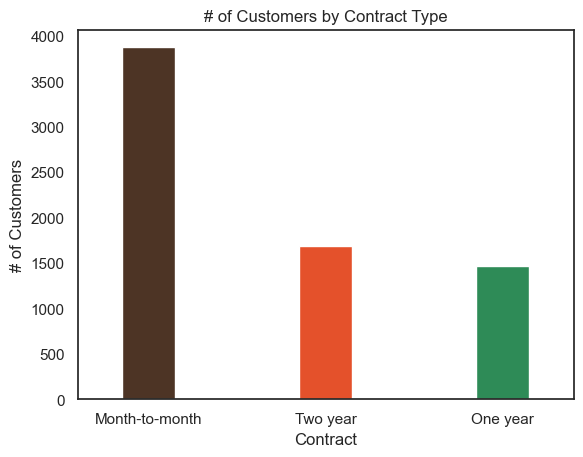

In [51]:
#2. la distribution des clients en fonction du type de contrat
# Define the colors for each contract type
colors = ['#4D3425', '#E4512B', '#2E8B57']  # Exemple de couleurs (ajustez-les selon vos besoins)

# Count the occurrences of each contract type
contract_counts = df['Contract'].value_counts()

# Create the bar plot with different colors
ax = contract_counts.plot(kind='bar', color=colors, rot=0, width=0.3)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')


Text(0.5, 1.0, 'Two Year Contract')

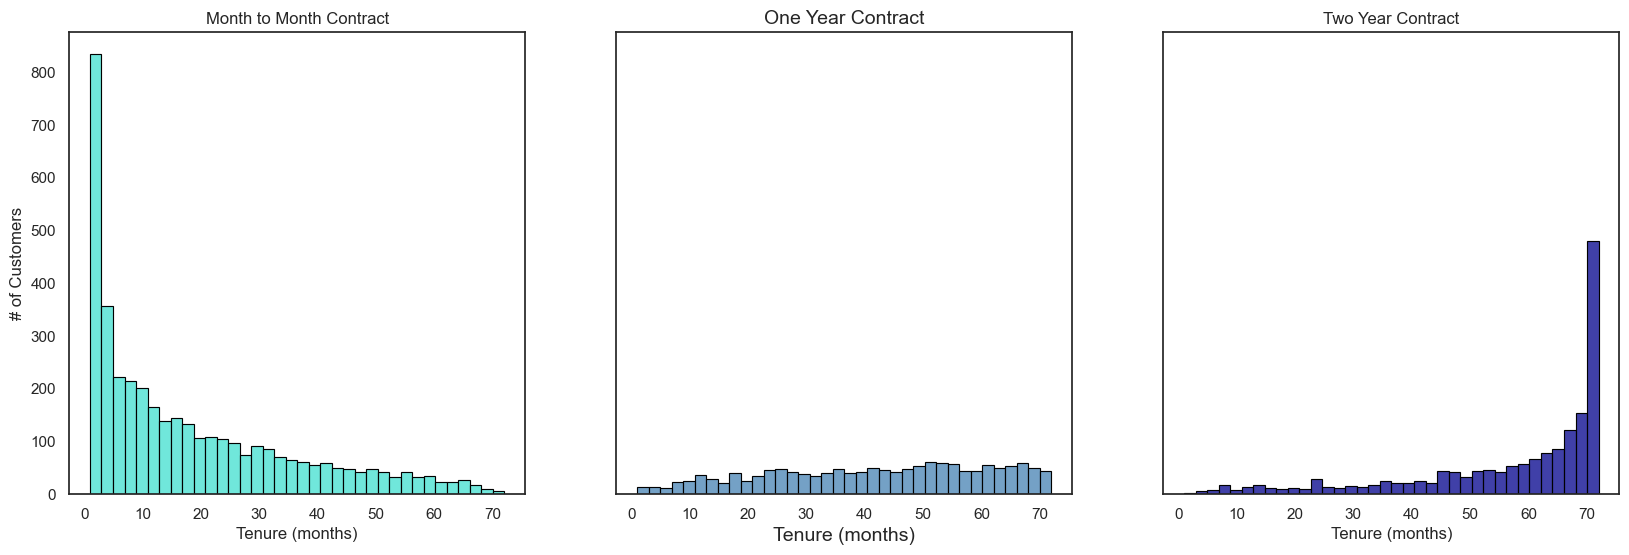

In [52]:
#la distribution des durées (tenure) des clients pour chaque type de contrat : "Month-to-month", "One year" et "Two year".
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Pour le contrat Month-to-month
ax = sns.histplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                  kde=False,
                  bins=int(180 / 5),
                  color='turquoise',
                  edgecolor='black',
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

# Pour le contrat One year
ax = sns.histplot(df[df['Contract'] == 'One year']['tenure'],
                  kde=False,
                  bins=int(180 / 5),
                  color='steelblue',
                  edgecolor='black',
                  ax=ax2)
ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('One Year Contract', size=14)

# Pour le contrat Two year
ax = sns.histplot(df[df['Contract'] == 'Two year']['tenure'],
                  kde=False,
                  bins=int(180 / 5),
                  color='darkblue',
                  edgecolor='black',
                  ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

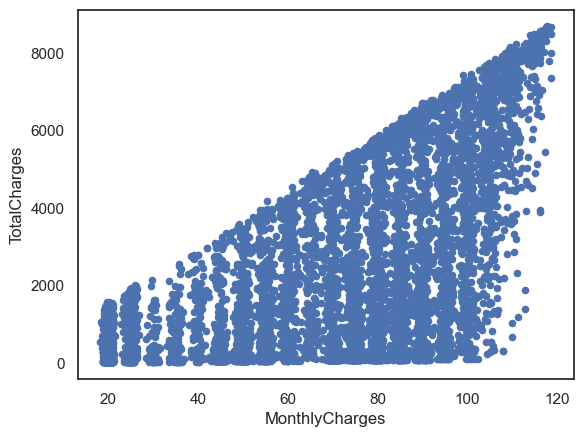

In [53]:
#Visualiser la relation entre les frais mensuels et les frais totaux des clients.
# 'MonthlyCharges' et 'TotalCharges') sont fortement corrélées et suivent probablement une relation très directe.
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges')

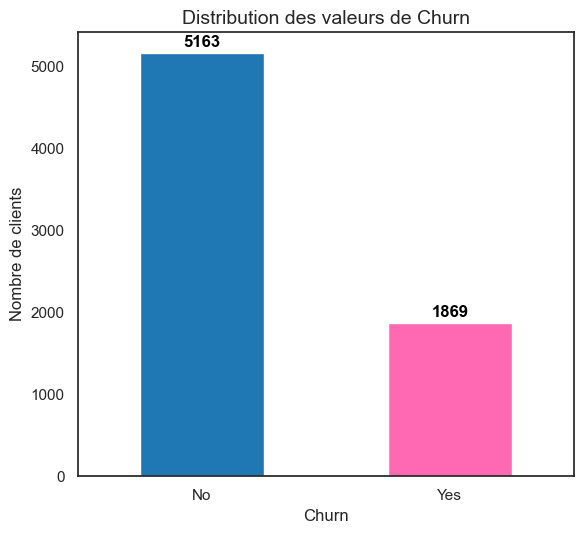

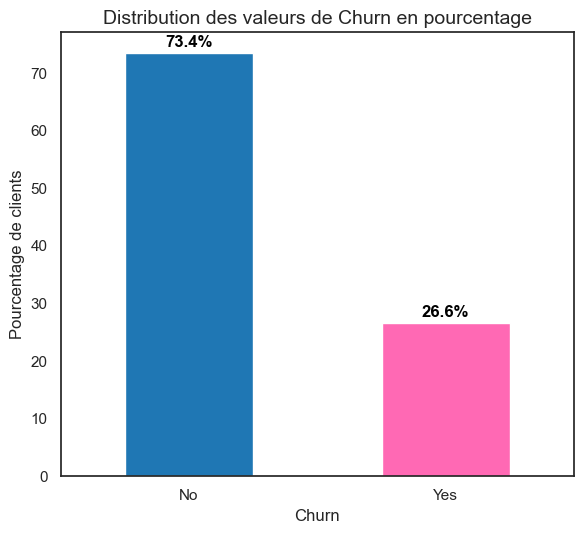

In [54]:
# la distribution des classes en pourcentage
import matplotlib.pyplot as plt

# Couleurs personnalisées pour les barres
colors = ['#1f77b4', '#ff69b4']

# Distribution des classes en valeurs absolues
plt.figure(figsize=(6, 5.5))
ax = df['Churn'].value_counts().plot(kind='bar', color=colors, rot=0)

# Titre et labels
ax.set_title('Distribution des valeurs de Churn', fontsize=14)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('Nombre de clients', fontsize=12)

# Ajouter les valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Affiche la valeur entière
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positionnement
                ha='center', va='center', xytext=(0, 8),  # Décalage du texte
                textcoords='offset points', fontsize=12, color='black', weight='bold')
plt.tight_layout()
plt.show()


# la distribution des classes en valeurs num 



# Calcul des pourcentages
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

# Distribution des classes en pourcentages
plt.figure(figsize=(6, 5.5))
ax = churn_percentages.plot(kind='bar', color=colors, rot=0)

# Titre et labels
ax.set_title('Distribution des valeurs de Churn en pourcentage', fontsize=14)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('Pourcentage de clients', fontsize=12)

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Affiche le pourcentage avec une décimale
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positionnement
                ha='center', va='center', xytext=(0, 8),  # Décalage du texte
                textcoords='offset points', fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()



0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


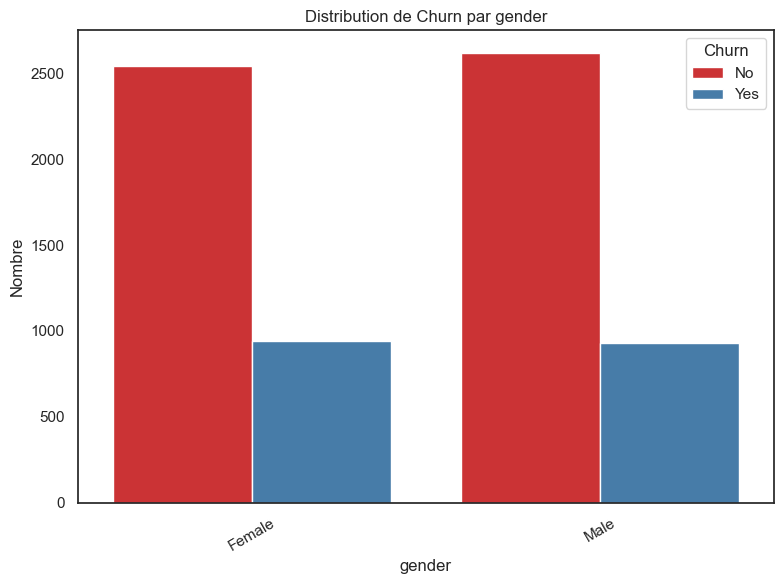

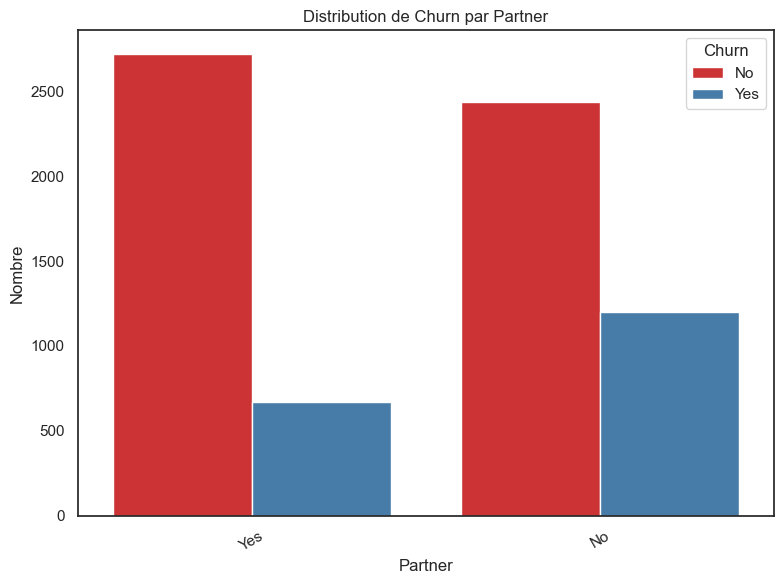

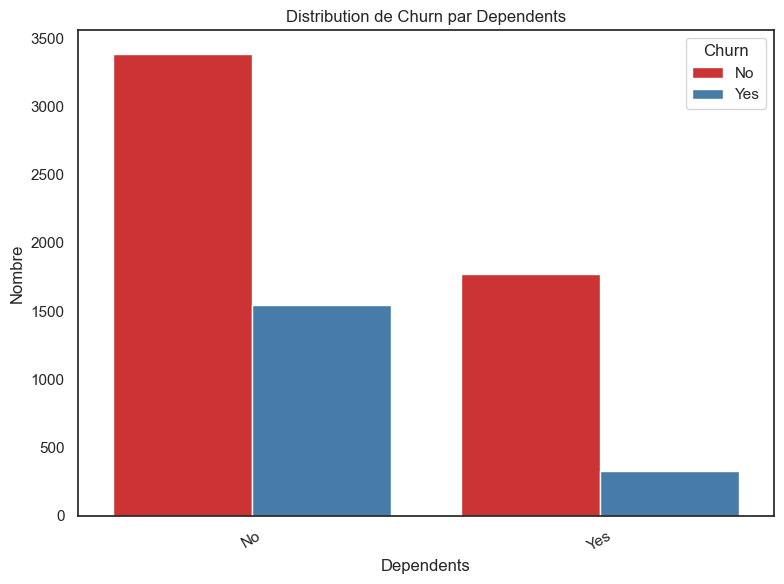

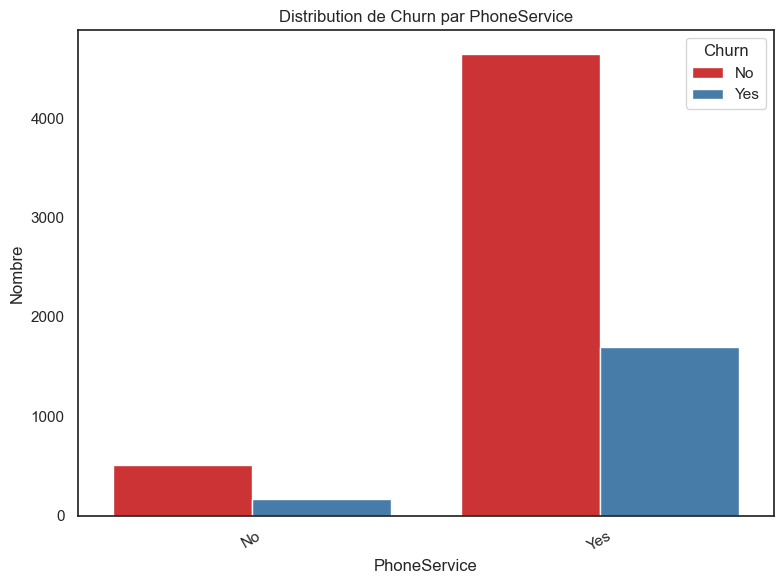

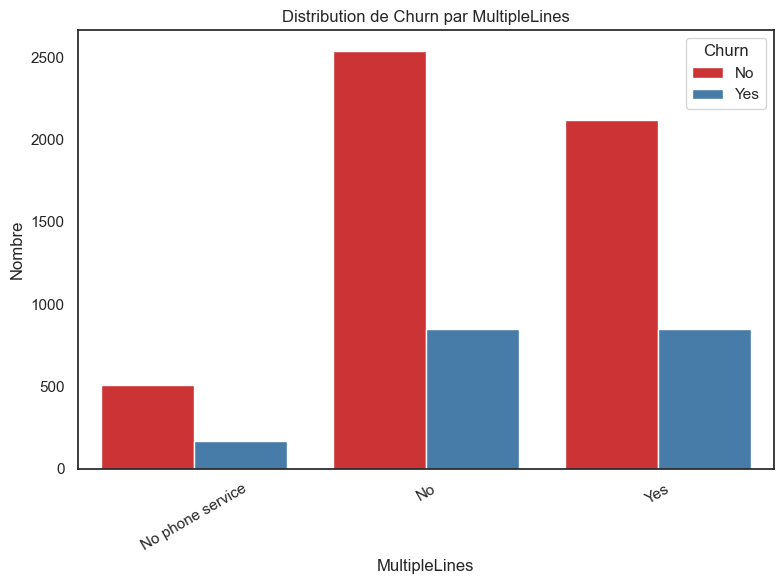

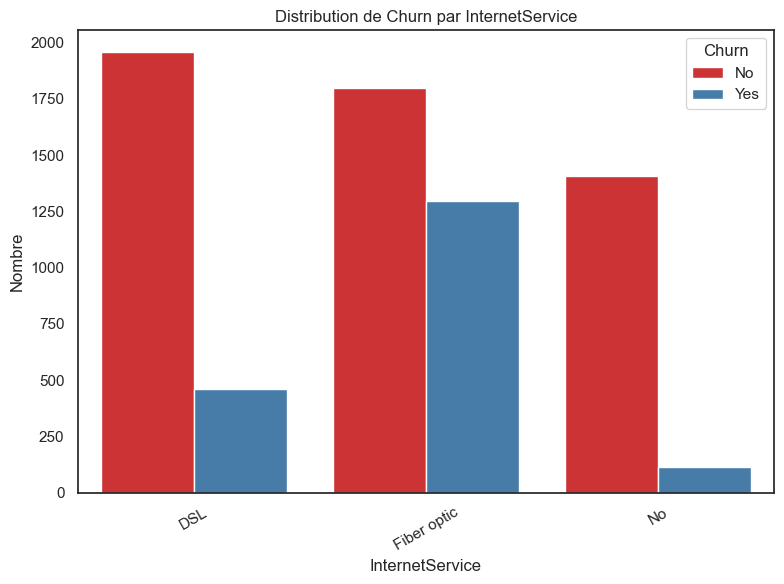

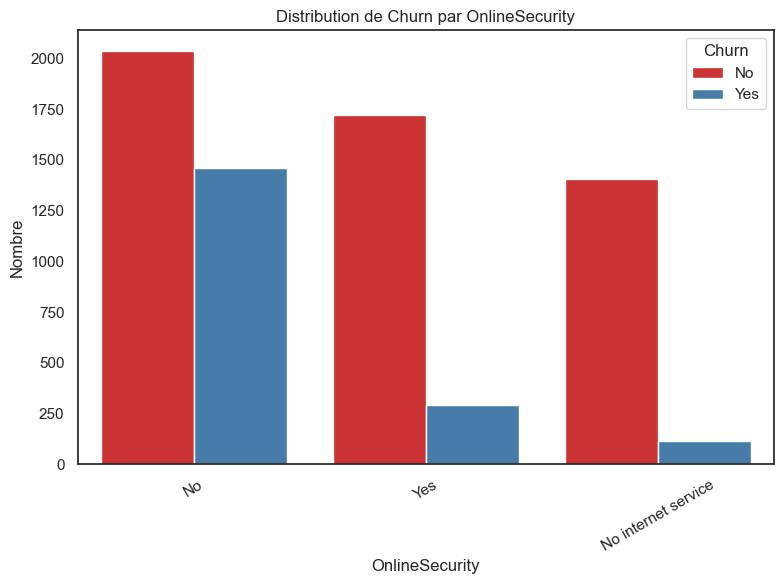

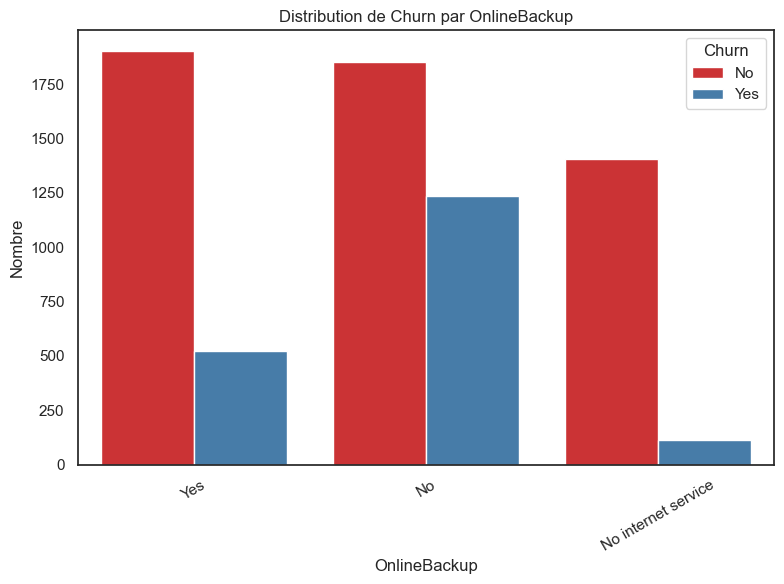

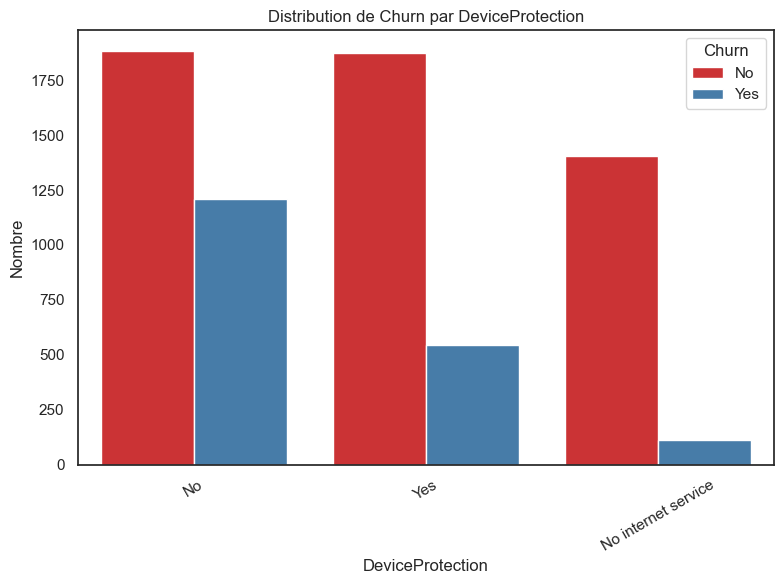

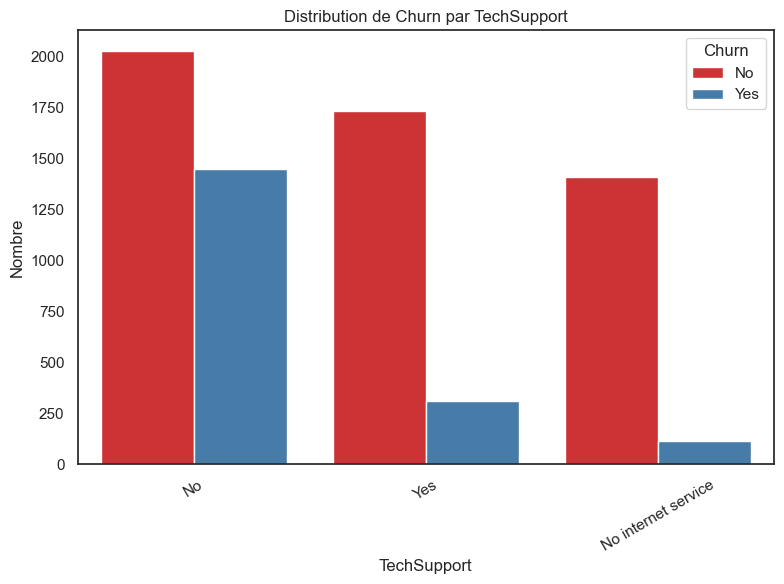

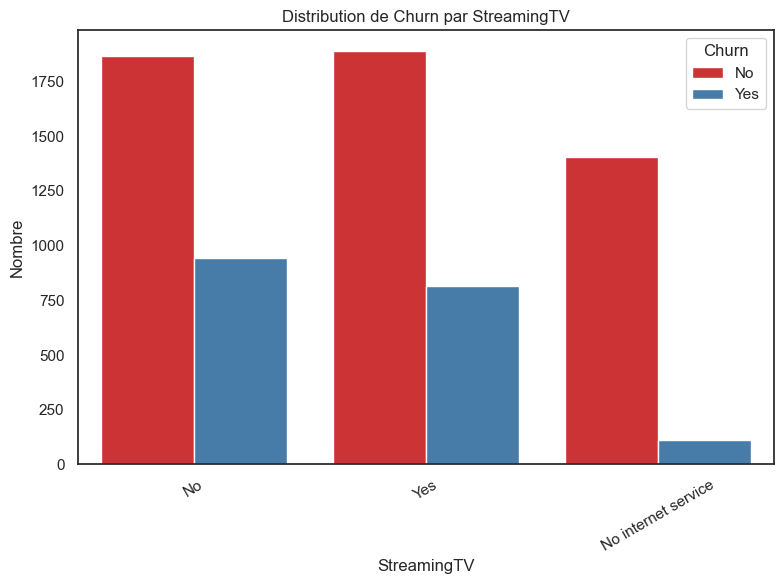

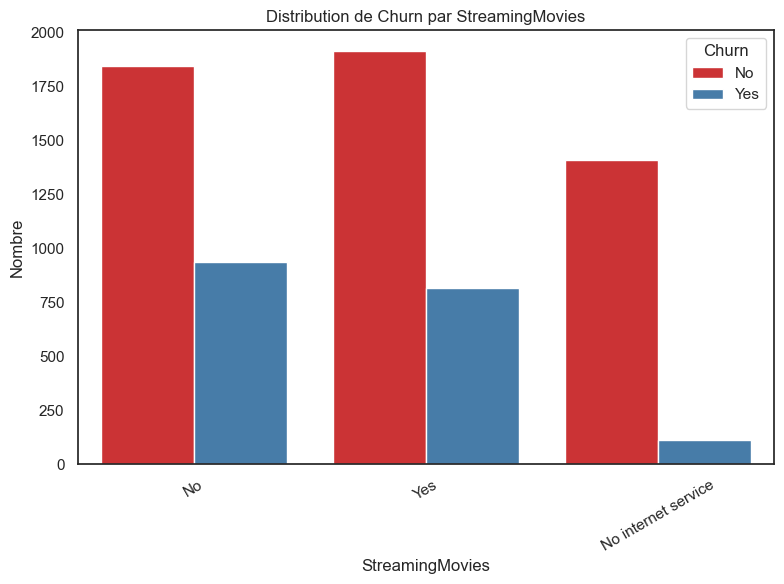

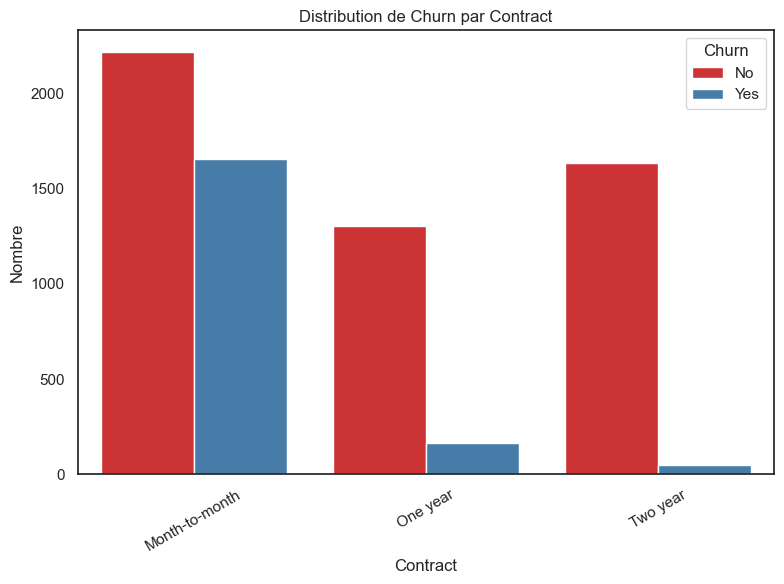

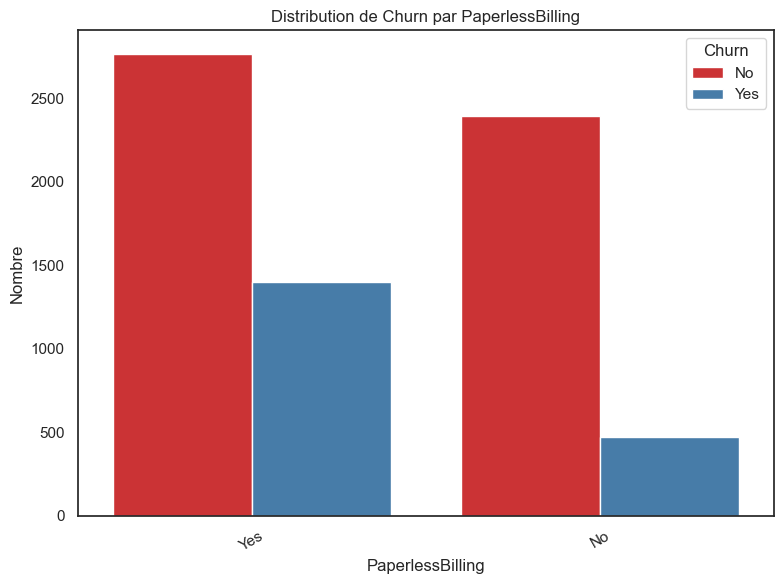

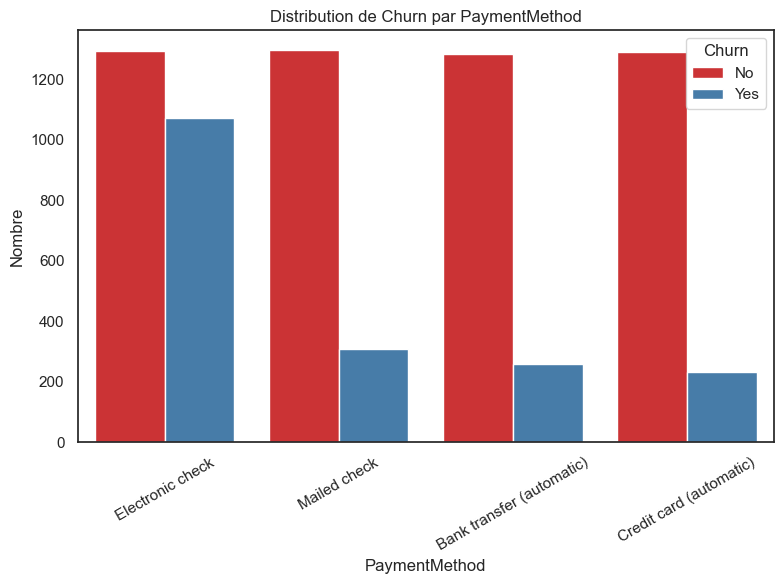

In [55]:
# Afficher la colonne 'Churn' du DataFrame df2
print(df2['Churn'])
# Sélectionner toutes les colonnes catégoriques sauf 'customerID' et 'Churn'
categorical_cols = df2.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Churn']]

# Générer des graphiques en barres pour chaque colonne catégorique
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    # Utilisation de la palette 'Set1' ou une autre palette avec des couleurs distinctes
    sns.countplot(data=df2, x=col, hue="Churn", palette="Set1")  
    plt.title(f"Distribution de Churn par {col}") 
    plt.ylabel("Nombre")
    plt.xticks(rotation=30)  # Rotation pour les labels si nécessaire
    plt.tight_layout()  # Ajuste automatiquement la mise en page
    plt.show()

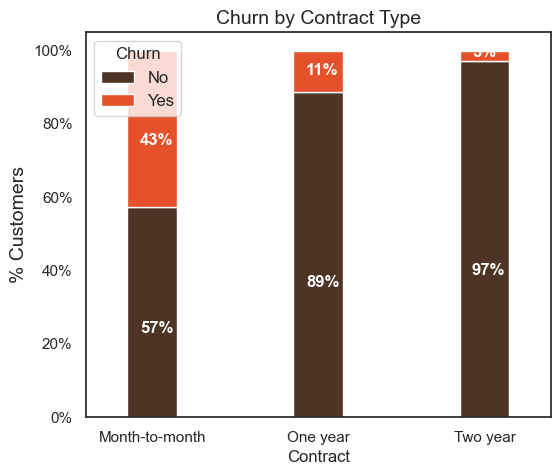

In [56]:
#Churn by Contract Type
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,5),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)

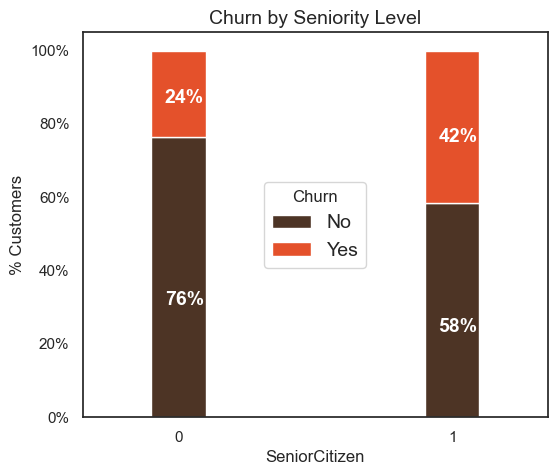

In [57]:
# Destribution des valeurs numerique : Monthly et totale chares, tenure, seniority level
#Churn by Seniority:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,5),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

<Axes: xlabel='Churn', ylabel='tenure'>

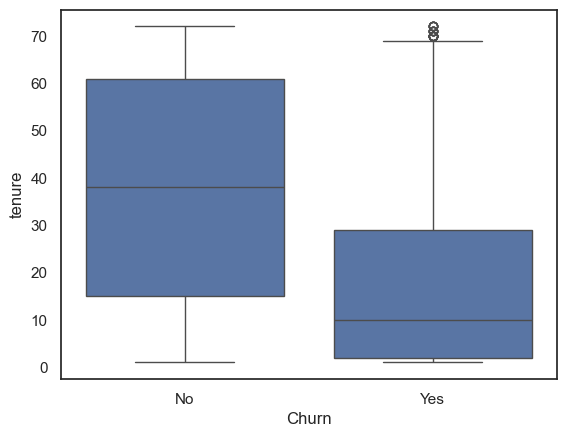

In [58]:
#un graphique en boîte (boxplot) pour visualiser la distribution des valeurs numeriques
#de la var tenure(durée de la relation avec le client) en fonction de Churn 
sns.boxplot(x = df.Churn, y = df.tenure)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

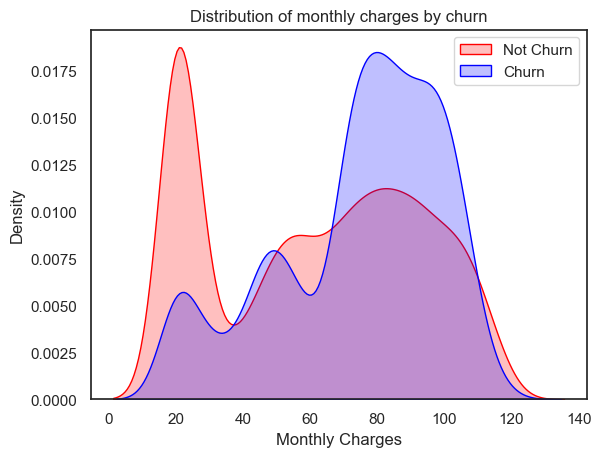

In [59]:
#Churn by Total Charges
# Convertir la colonne 'TotalCharges' en numérique (remplacer les erreurs par NaN)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Churn par Total Charges
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="Red", fill=True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


Text(0.5, 1.0, 'Distribution of total charges by churn')

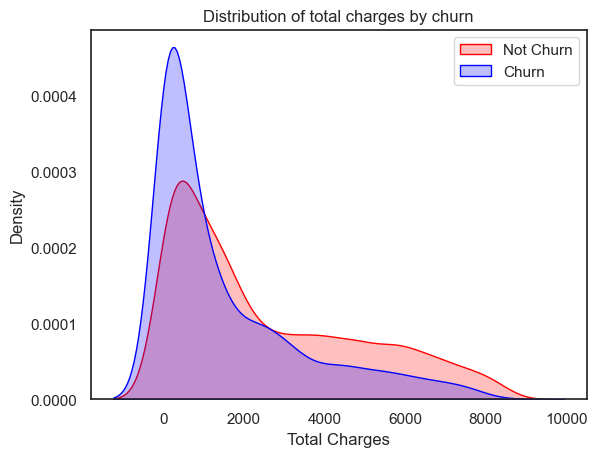

In [60]:
#Churn by Total Charges
# Convertir la colonne 'TotalCharges' en numérique (remplacer les erreurs par NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Churn par Total Charges
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Red", fill=True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')


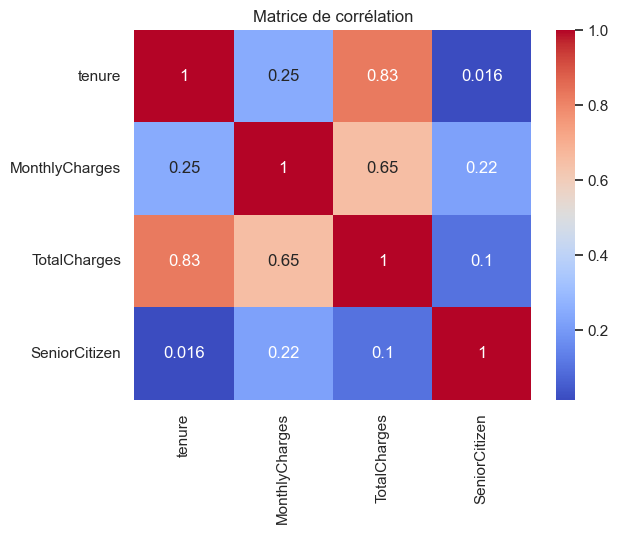

In [61]:
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen" ]
# Matrice de corrélation
corr_matrix = df2[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [62]:
# Convertir la variable prédictive "Churn" en une variable binaire numérique
df2['Churn'] = df2['Churn'].replace({'Yes': 1, 'No': 0})

# Convertir toutes les variables catégorielles en variables fictives (One-Hot Encoding)
df_dummies = pd.get_dummies(df2, drop_first=True).astype(int)  # drop_first=True pour éviter la colinéarité

# Distribution des classes de Churn : 0 ou 1
print(df_dummies['Churn'].value_counts(normalize=True))

# Afficher les 5 premières lignes pour vérifier la conversion
df_dummies.head(5)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_15472\1482206216.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Churn'] = df2['Churn'].replace({'Yes': 1, 'No': 0})


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


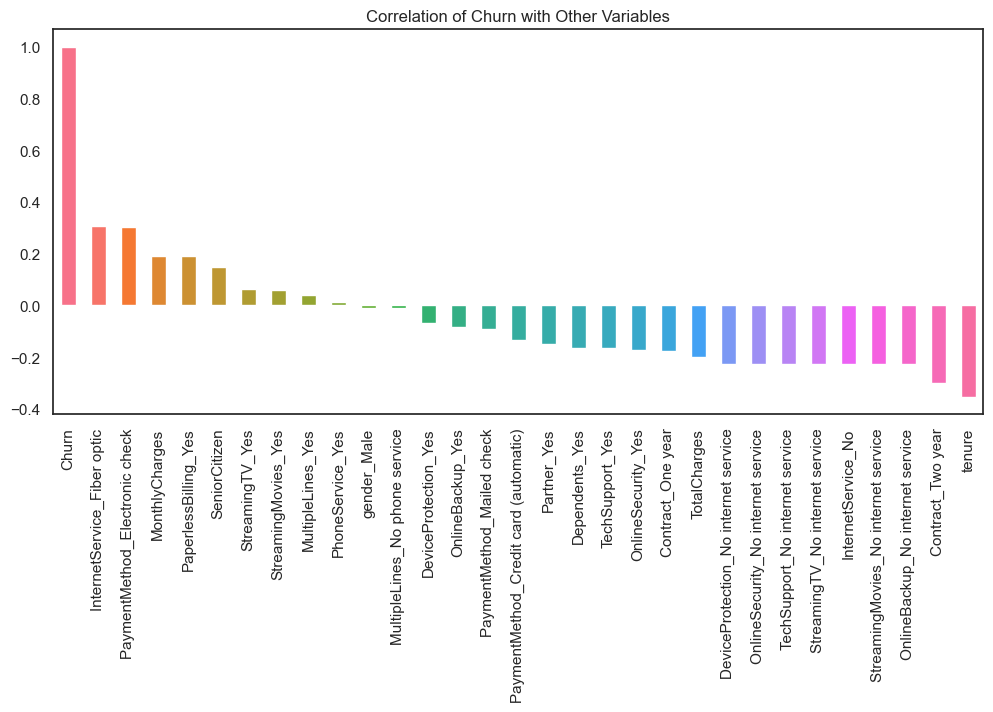

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns  # Pour les palettes de couleurs

# Définir une palette de couleurs
colors = sns.color_palette('husl', len(df_dummies.corr()['Churn']))  # 'husl' donne des couleurs variées

#Get Correlation(on plus d'influence sur les churn) of "Churn" with other variables:
# déterminer les relations entre Churn et les autres caractérs des clients 
plt.figure(figsize=(12, 5))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Correlation of Churn with Other Variables')
plt.show()

In [64]:
# division du dataset en entrainement et test
from sklearn.model_selection import train_test_split


# Séparer les features et la cible
X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn']

print(f"Taille du dataset : {df_dummies.shape[0]} échantillons")
# Diviser les données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Afficher la taille des ensembles d'entraînement et de test
print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")


Taille du dataset : 7032 échantillons
Taille du jeu d'entraînement : 5625 échantillons
Taille du jeu de test : 1407 échantillons


In [65]:
#Application de la mise à l'echelle des variables ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import StandardScaler


# Initialiser le scaler
scaler = StandardScaler()

# Créer une copie des jeux de données pour la mise à l'échelle
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Sélectionner uniquement les colonnes à mettre à l'échelle
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Appliquer la standardisation aux variables spécifiques dans l'ensemble d'entraînement
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Appliquer la transformation à l'ensemble de test (utilisez transform, pas fit_transform)
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Vérification des résultats après mise à l'échelle
print(X_train_scaled[columns_to_scale].head())  # Affiche les premières lignes des données mises à l'échelle dans X_train


        tenure  MonthlyCharges  TotalCharges
1413  1.321816        0.978740      1.659778
7003 -0.267410       -0.980943     -0.562267
3355  1.444064        0.845881      1.756025
4494 -1.204646        0.646591     -0.908142
3541  0.669826       -0.814868     -0.101685


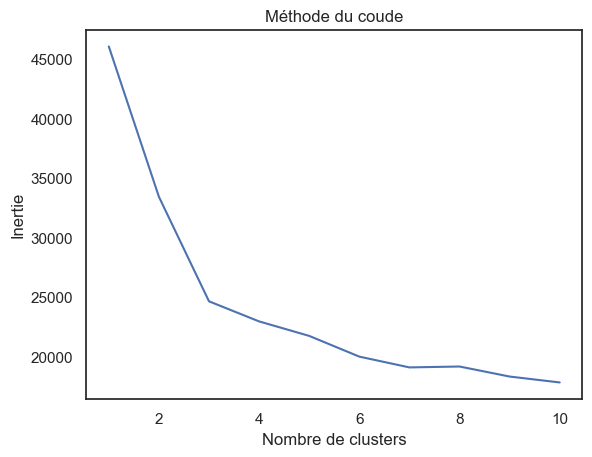

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Utilisez X_train_scaled ou un autre DataFrame
X_dummies = X_train_scaled  # utiliser le mis à l'échelle (avec StandardScaler) pour appliquer le clustering.
#X_train_scaled (entrainement seulement ) pour éviter la fuite de données (le data leakage).
inertia = []
for i in range(1, 11):  # Tester de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)  # Ajout d'un random_state pour la reproductibilité
    kmeans.fit(X_dummies)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


Centres des clusters :
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0       0.037252 -0.075335       -1.459041     -0.718693     0.495861   
1       0.205495  1.034667        0.826554      1.269769     0.503846   
2       0.189064 -0.690062        0.099420     -0.555563     0.503273   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0     0.482616        0.419702          1.000000   
1     0.689560        0.345055          0.931868   
2     0.345013        0.211783          0.837890   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                   -9.714451e-17           0.221854  ...   
1                    6.813187e-02           0.700549  ...   
2                    1.621101e-01           0.324220  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                     1.000000e+00     5.551115e-16   
1                     0.000000e+00     7.186813e-01   
2                     2.775558e-17     3.388525e-01   

   Stream

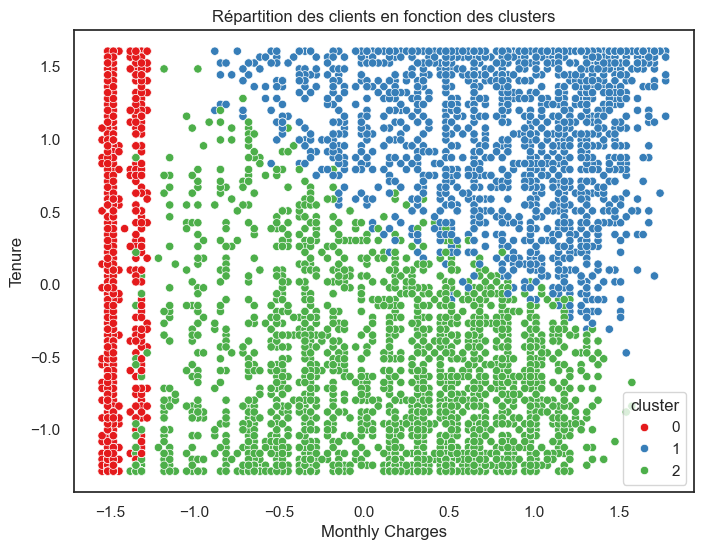

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assurez-vous d'utiliser X_train_scaled pour KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Appliquez le clustering sur les données mises à l'échelle de l'ensemble d'entraînement
df_train_scaled = X_train_scaled.copy()  # Copiez X_train_scaled pour ne pas toucher à df_dummies
df_train_scaled['cluster'] = kmeans.fit_predict(X_train_scaled)  # Appliquez le clustering

# Analyser les centres des clusters pour interpréter
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_train_scaled.columns)
print("Centres des clusters :")
print(centers)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train_scaled['MonthlyCharges'], y=df_train_scaled['tenure'], hue=df_train_scaled['cluster'], palette='Set1')
plt.title('Répartition des clients en fonction des clusters')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()

Distribution des classes dans l'ensemble d'entraînement avant SMOTE :
Before SMOTE (Train): Counter({0: 4130, 1: 1495})


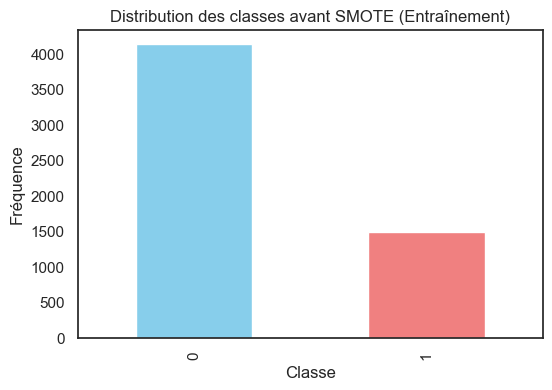

Distribution des classes dans l'ensemble d'entraînement après SMOTE :
After SMOTE (Train): Counter({0: 4130, 1: 4130})


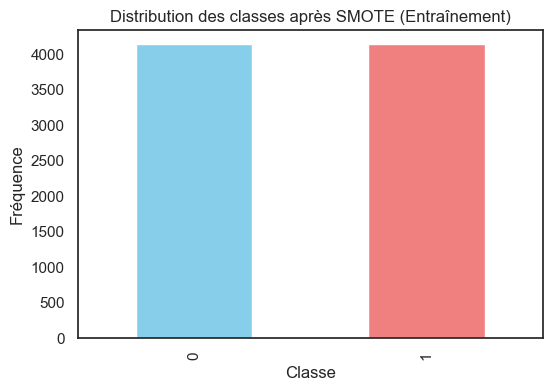

Répartition des classes après SMOTE (Entraînement) en pourcentage :
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble de test :
Before SMOTE (Test): Counter({0: 1033, 1: 374})


In [68]:
#SMOTE doit être appliqué uniquement sur les données d'entraînement (X_train) et non sur l'ensemble du jeu de données
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Supposons que df_dummies contienne vos features et y_dummies votre cible
X_dummies = df_dummies.drop(columns=['Churn'])  # Exclure la colonne cible 'Churn'
y_dummies = df_dummies['Churn']

# Diviser les données en jeux d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_dummies, test_size=0.2, random_state=42, stratify=y_dummies)

# Vérifiez la distribution des classes avant SMOTE
print("Distribution des classes dans l'ensemble d'entraînement avant SMOTE :")
counter_train = Counter(y_train)
print('Before SMOTE (Train):', counter_train)

# Optionnel : Visualiser la distribution des classes avant SMOTE
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', title='Distribution des classes avant SMOTE (Entraînement)', color=['skyblue', 'lightcoral'])
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.show()

# Appliquer SMOTE uniquement sur les données d'entraînement pour équilibrer les classes
smt = SMOTE(random_state=42)  # Ajout du random_state pour la reproductibilité
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Vérifiez la distribution après SMOTE
print("Distribution des classes dans l'ensemble d'entraînement après SMOTE :")
counter_train_sm = Counter(y_train_sm)
print('After SMOTE (Train):', counter_train_sm)

# Optionnel : Visualiser la distribution des classes après SMOTE
plt.figure(figsize=(6, 4))
y_train_sm.value_counts().plot(kind='bar', title='Distribution des classes après SMOTE (Entraînement)', color=['skyblue', 'lightcoral'])
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.show()

# Afficher la répartition des classes après SMOTE sous forme de pourcentage
print('Répartition des classes après SMOTE (Entraînement) en pourcentage :')
print(y_train_sm.value_counts(normalize=True))

# Distribution des classes dans l'ensemble de test (avant SMOTE)
print("Distribution des classes dans l'ensemble de test :")
counter_test = Counter(y_test)
print('Before SMOTE (Test):', counter_test)

# Si tu souhaites entraîner un modèle avec les données équilibrées, tu peux utiliser X_train_sm et y_train_sm.


Variables les plus corrélées avec 'Churn':
tenure                                  0.351710
InternetService_Fiber optic             0.306416
PaymentMethod_Electronic check          0.305342
Contract_Two year                       0.301801
InternetService_No                      0.227420
OnlineSecurity_No internet service      0.227420
TechSupport_No internet service         0.227420
StreamingMovies_No internet service     0.227420
DeviceProtection_No internet service    0.227420
OnlineBackup_No internet service        0.227420
Name: Churn, dtype: float64


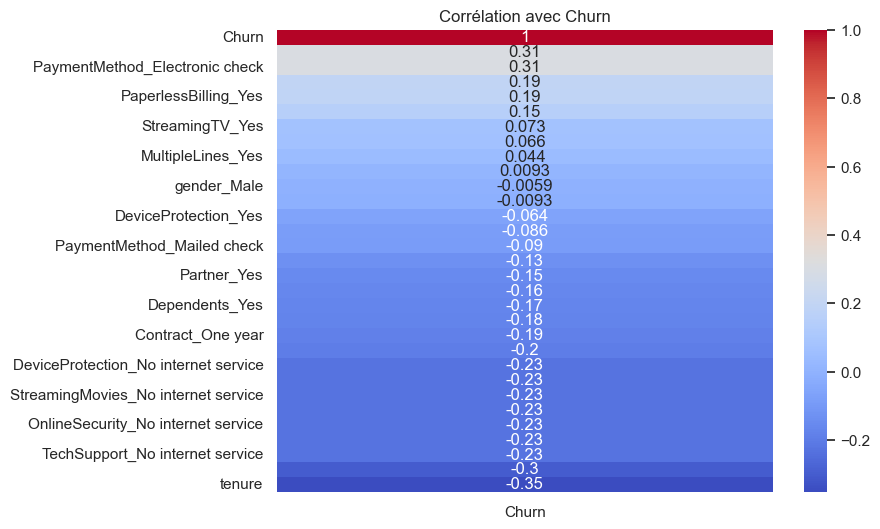

In [69]:
# Ajoutez y_train à X_train_scaled pour calculer la corrélation
df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train['Churn'] = y_train  # Ajouter la colonne cible 'Churn'

# Calcul de la corrélation entre les variables
correlation_matrix = df_train.corr()

# Trier les variables par corrélation absolue avec 'Churn'
correlation_with_target = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Afficher les 10 caractéristiques les plus corrélées
top_features = correlation_with_target[1:11]  # Exclure 'Churn' lui-même
print("Variables les plus corrélées avec 'Churn':")
print(top_features)

# Visualisation de la corrélation avec 'Churn'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Corrélation avec Churn')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      1033
           1       0.47      0.73      0.57       374

    accuracy                           0.71      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.77      0.71      0.72      1407

Confusion Matrix:
 [[720 313]
 [101 273]]

Métriques supplémentaires :
Accuracy: 0.7058
Précision: 0.4659
Recall: 0.7299
F1-Score: 0.5687
ROC-AUC: 0.7735


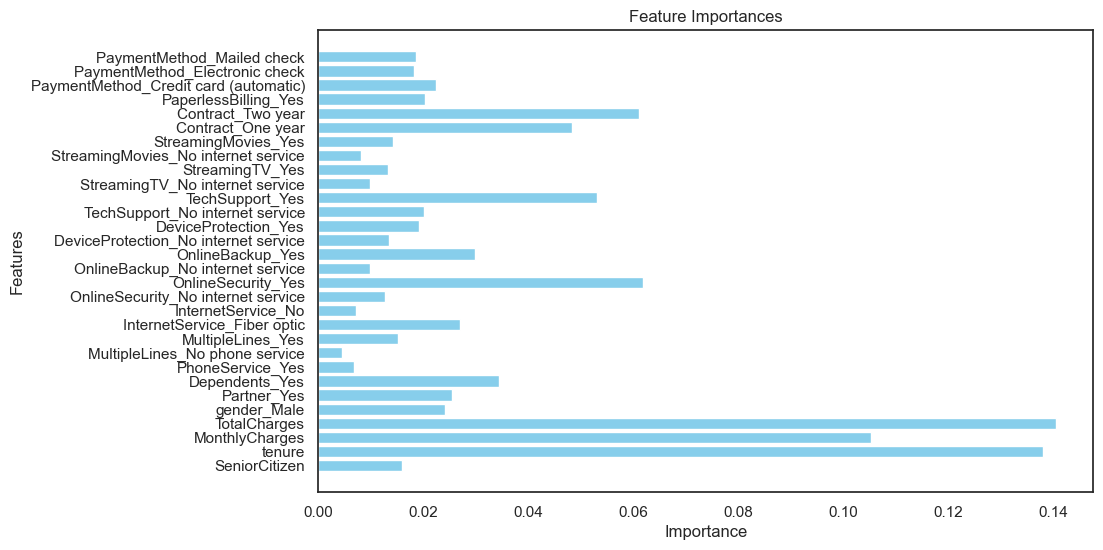

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Entraîner un modèle Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Prédictions sur les données de test
y_pred = rf.predict(X_test_scaled)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])

# Afficher les résultats
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nMétriques supplémentaires :")
print(f"Accuracy: {accuracy:.4f}")
print(f"Précision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Visualisation simple des importances des features
importances = rf.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84      1033
           1       0.57      0.46      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407

Confusion Matrix:
 [[904 129]
 [203 171]]

Métriques supplémentaires :
Accuracy: 0.7640
Précision: 0.5700
Recall: 0.4572
F1-Score: 0.5074
ROC-AUC: 0.7666


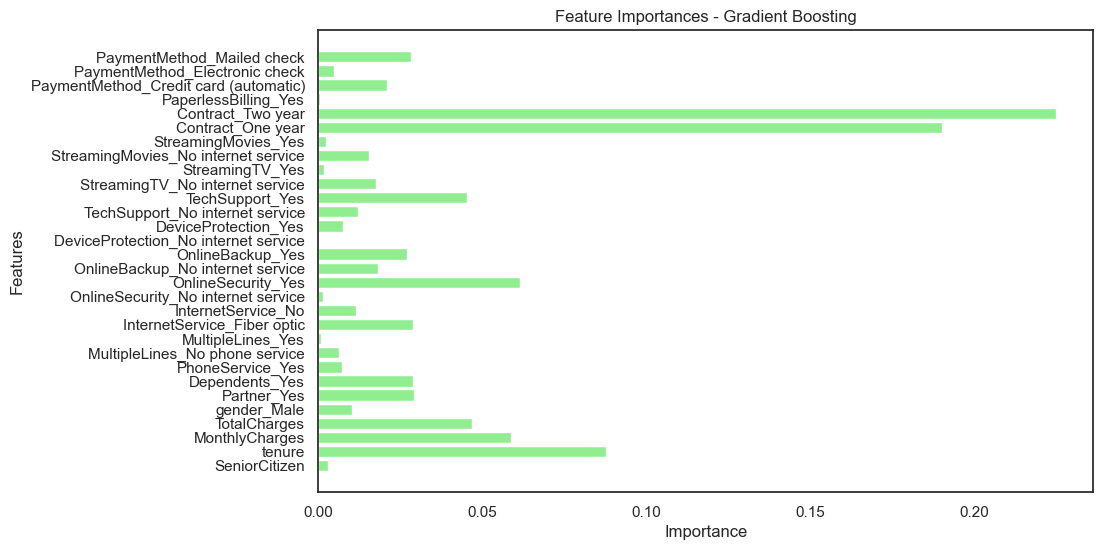

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Initialiser et entraîner le modèle Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sm, y_train_sm)

# Prédictions sur les données de test
y_pred = gb.predict(X_test_scaled)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test_scaled)[:, 1])

# Afficher les résultats
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nMétriques supplémentaires :")
print(f"Accuracy: {accuracy:.4f}")
print(f"Précision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Visualisation simple des importances des features
importances = gb.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='lightgreen')
plt.title("Feature Importances - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1033
           1       0.47      0.83      0.60       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.80      0.70      0.72      1407

Confusion Matrix:
 [[678 355]
 [ 63 311]]

Métriques supplémentaires :
Accuracy: 0.7029
Précision: 0.4670
Recall: 0.8316
F1-Score: 0.5981
ROC-AUC: 0.8253
Validation croisée - Scores AUC :  [0.81251063 0.86625794 0.97710091 0.96798583 0.97002166]
Validation croisée - Moyenne AUC :  0.9187753929494809


<Figure size 600x400 with 0 Axes>

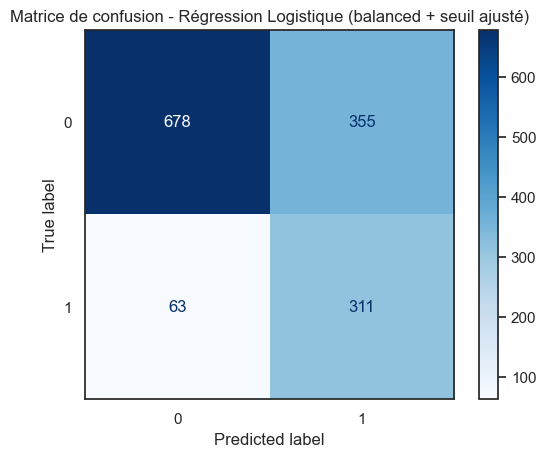

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)  # ✅ correction du bug

# Régression logistique avec équilibrage des classes
log_reg = LogisticRegression(
    random_state=42,
    solver='saga',
    max_iter=1000,
    class_weight='balanced'  # ✅ gestion du déséquilibre
)
log_reg.fit(X_train_scaled, y_train_sm)

# Probabilités et ajustement du seuil
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba >= 0.3).astype(int)  # ✅ seuil ajusté

# Évaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calcul des autres métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Affichage des résultats
print("\nMétriques supplémentaires :")
print(f"Accuracy: {accuracy:.4f}")
print(f"Précision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Validation croisée
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train_sm, cv=5, scoring="roc_auc")
print("Validation croisée - Scores AUC : ", cv_scores)
print("Validation croisée - Moyenne AUC : ", cv_scores.mean())

# Matrice de confusion
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title('Matrice de confusion - Régression Logistique (balanced + seuil ajusté)')
plt.show()


=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.77      1033
           1       0.47      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407

Confusion Matrix:
 [[686 347]
 [ 70 304]]
Accuracy: 0.7036
Precision: 0.4670
Recall: 0.8128
F1-Score: 0.5932
ROC-AUC: 0.8119


<Figure size 600x400 with 0 Axes>

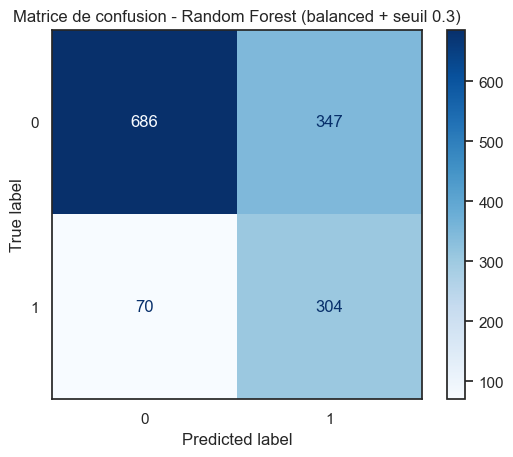

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation du modèle
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

# Entraînement
rf_clf.fit(X_train_scaled, y_train_sm)

# Prédictions
y_pred_rf_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (y_pred_rf_proba >= 0.3).astype(int)

# Évaluation
print("=== Random Forest ===")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf_proba):.4f}")

# Matrice de confusion
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap='Blues')
plt.title('Matrice de confusion - Random Forest (balanced + seuil 0.3)')
plt.show()


=== XGBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407

Confusion Matrix:
 [[758 275]
 [103 271]]
Accuracy: 0.7313
Precision: 0.4963
Recall: 0.7246
F1-Score: 0.5891
ROC-AUC: 0.8026


c:\Users\dell\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 600x400 with 0 Axes>

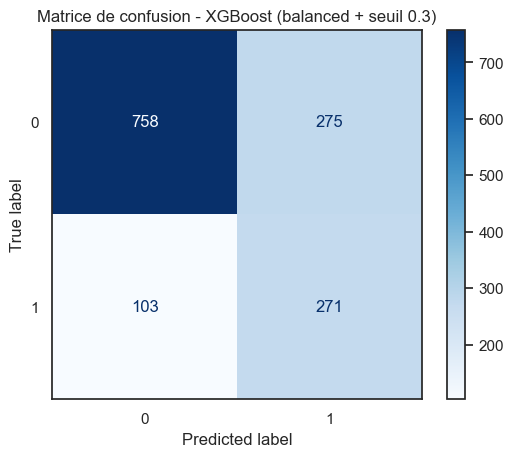

In [77]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation du modèle
xgb_clf = XGBClassifier(
    random_state=42,
    scale_pos_weight=(y_train_sm == 0).sum() / (y_train_sm == 1).sum(),  # gère le déséquilibre
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entraînement
xgb_clf.fit(X_train_scaled, y_train_sm)

# Prédictions
y_pred_xgb_proba = xgb_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb = (y_pred_xgb_proba >= 0.3).astype(int)

# Évaluation
print("=== XGBoost ===")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb_proba):.4f}")

# Matrice de confusion
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot(cmap='Blues')
plt.title('Matrice de confusion - XGBoost (balanced + seuil 0.3)')
plt.show()


=== Comparatif des modèles ===


,Logistic Regression,Random Forest,XGBoost
Accuracy,0.702914,0.703625,0.731343
Precision,0.466967,0.466974,0.496337
Recall,0.831551,0.812834,0.724599
F1,0.598077,0.593171,0.589130
ROC-AUC,0.825282,0.811855,0.802571


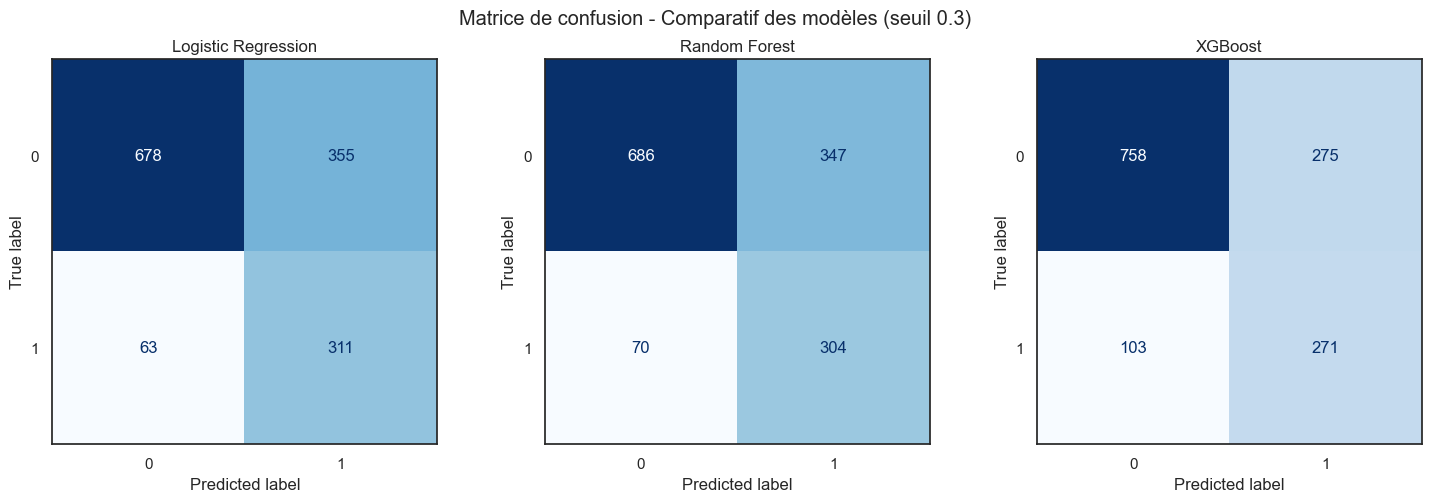

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Création d'un dictionnaire pour stocker les résultats
results = {}

# -----------------------------
# Logistic Regression
# -----------------------------
y_pred_lr_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = (y_pred_lr_proba >= 0.3).astype(int)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr, zero_division=0),
    'Recall': recall_score(y_test, y_pred_lr, zero_division=0),
    'F1': f1_score(y_test, y_pred_lr, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr)
}

# -----------------------------
# Random Forest
# -----------------------------
y_pred_rf_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (y_pred_rf_proba >= 0.3).astype(int)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, zero_division=0),
    'Recall': recall_score(y_test, y_pred_rf, zero_division=0),
    'F1': f1_score(y_test, y_pred_rf, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}

# -----------------------------
# XGBoost
# -----------------------------
y_pred_xgb_proba = xgb_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb = (y_pred_xgb_proba >= 0.3).astype(int)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb, zero_division=0),
    'Recall': recall_score(y_test, y_pred_xgb, zero_division=0),
    'F1': f1_score(y_test, y_pred_xgb, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}

# -----------------------------
# Tableau comparatif
# -----------------------------
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
df_results = pd.DataFrame({model: [results[model][m] for m in metrics] for model in results}, index=metrics)
print("=== Comparatif des modèles ===")
display(df_results)

# -----------------------------
# Affichage des matrices de confusion côte à côte
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, model in zip(axes, results):
    ConfusionMatrixDisplay(results[model]['Confusion Matrix']).plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(model)

plt.suptitle('Matrice de confusion - Comparatif des modèles (seuil 0.3)')
plt.show()
